In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from os import path 

In [69]:
def process_baseline_results() :
    cartoon_file = "./results/baseline/cartoon/results.csv"
    photo_file = "./results/baseline/photo/results.csv"
    sketch_file = "./results/baseline/sketch/results.csv"

    if not path.exists(cartoon_file) or not path.exists(photo_file) or not path.exists(sketch_file) :
        raise BaseException('One or more files not found')
    
    cartoon_res = pd.read_csv(cartoon_file)
    cartoon_res.columns = cartoon_res.columns.str.strip()

    sketch_res = pd.read_csv(sketch_file)
    sketch_res.columns = sketch_res.columns.str.strip()
    
    photo_res = pd.read_csv(photo_file)
    photo_res.columns = photo_res.columns.str.strip()

    return pd.DataFrame([[np.max(cartoon_res['Accuracy']), np.max(sketch_res['Accuracy']), np.max(photo_res['Accuracy'])]], columns=['Art->Cartoon', 'Art->Sketch', 'Art->Photo'])

In [80]:
process_baseline_results()

,Art->Cartoon,Art->Sketch,Art->Photo
0,0.558447,0.405701,0.956287


In [81]:
process_baseline_results().style.hide(axis='index').to_latex()

'\\begin{tabular}{rrr}\nArt->Cartoon & Art->Sketch & Art->Photo \\\\\n0.558447 & 0.405701 & 0.956287 \\\\\n\\end{tabular}\n'

In [86]:
def plot_random_results() :
    cartoon_file = "./results/random/cartoon/results.csv"
    photo_file = "./results/random/photo/results.csv"
    sketch_file = "./results/random/sketch/results.csv"

    if not path.exists(cartoon_file) or not path.exists(photo_file) or not path.exists(sketch_file) :
        raise BaseException('One or more files not found')
    
    cartoon_res = pd.read_csv(cartoon_file)
    cartoon_res.columns = cartoon_res.columns.str.strip()
    cartoon_res = cartoon_res.rename(columns={'Ratio of 1s (if random)' : 'ratio_1'})

    sketch_res = pd.read_csv(sketch_file)
    sketch_res.columns = sketch_res.columns.str.strip()
    sketch_res = sketch_res.rename(columns={'Ratio of 1s (if random)' : 'ratio_1'})
    
    photo_res = pd.read_csv(photo_file)
    photo_res.columns = photo_res.columns.str.strip()
    photo_res = photo_res.rename(columns={'Ratio of 1s (if random)' : 'ratio_1'})


    datasets = {'Cartoon' : cartoon_res, 'Sketch' : sketch_res, 'Photo' : photo_res}
    acc_max = dict()
    for name, dataset in datasets.items() :
        acc_max[name] = dict()
        for ratio in np.unique(dataset['ratio_1']) :
            acc_max[name][ratio] = np.max(dataset[dataset['ratio_1'] == ratio]['Accuracy'])
    
    ratios = np.unique(cartoon_res['ratio_1'])
    for name in datasets.keys() :
        plt.plot(ratios, list(acc_max[name].values()), '--o', label=name)

    plt.xlabel("Percentage of 1 in the activation mask")
    plt.ylabel("Max reached accuracy on target domain")
    plt.title("Max accuracy vs. Fraction of 1 in activation mask")
    plt.legend(loc=(0.05,0.63))
    plt.show()


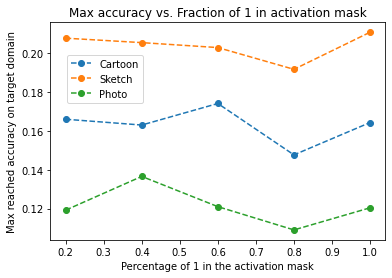

In [87]:
# A table is probably best
plot_random_results()

In [88]:
def plot_DA_results() :
    cartoon_file = "./results/DA/cartoon/results.csv"
    photo_file = "./results/DA/photo/results.csv"
    sketch_file = "./results/DA/sketch/results.csv"

    if not path.exists(cartoon_file) or not path.exists(photo_file) or not path.exists(sketch_file) :
        raise BaseException('One or more files not found')
    
    cartoon_res = pd.read_csv(cartoon_file)
    cartoon_res.columns = cartoon_res.columns.str.strip()
    cartoon_res = cartoon_res.rename(columns={'Location of ASM (if needed)' : 'Loc_ASM'})
    
    sketch_res = pd.read_csv(sketch_file)
    sketch_res.columns = sketch_res.columns.str.strip()
    sketch_res = sketch_res.rename(columns={'Location of ASM (if needed)' : 'Loc_ASM'})
    
    photo_res = pd.read_csv(photo_file)
    photo_res.columns = photo_res.columns.str.strip()
    photo_res = photo_res.rename(columns={'Location of ASM (if needed)' : 'Loc_ASM'})

    datasets = {'Cartoon' : cartoon_res, 'Sketch' : sketch_res, 'Photo' : photo_res}
    acc_max = dict()
    for name, dataset in datasets.items() :
        acc_max[name] = dict()
        for layer in np.unique(dataset['Loc_ASM']) :
            acc_max[name][layer] = np.max(dataset[dataset['Loc_ASM'] == layer]['Accuracy'])

    layers = np.unique(cartoon_res['Loc_ASM'])
    for name in datasets.keys() :
        plt.plot(layers, list(acc_max[name].values()), '--o', label=name)

    plt.xticks(rotation=45)
    plt.xlabel("Layer(s) where the ASM is located")
    plt.ylabel("Max reached accuracy on target domain")
    plt.title("Max accuracy vs. Layer of ASM for DA")
    plt.legend(loc=(0.05,0.63))
    plt.show()


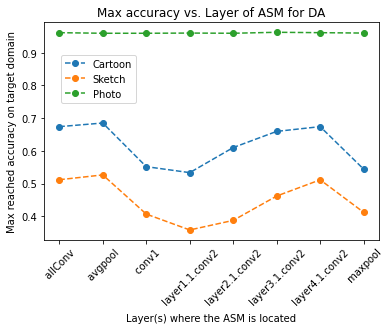

In [89]:
# A table is best
plot_DA_results()